## Intensity Transformation
## Bit Plane Slicing

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import requests
from urllib.request import urlopen
from google.colab.patches import cv2_imshow
import imageio

%matplotlib inline

## Loading Images
#### 1. I store my image url in a variable
#### 2. Downloaded image data using a request function from urlib library
#### 3. Stored the doanloaded image data in two variables named baseImage and msgImage in numpy array format with uint8 data type.
#### 4. Used matplotlib to show my images.

In [ ]:
readFlag=cv2.IMREAD_COLOR
url = 'https://www.freeimages.com/download/file/e8de5eef5731007f0b7db9310114c8d1/1279x822'
resp = urlopen(url)

baseImage = np.asarray(bytearray(resp.read()), dtype="uint8")
baseImage = cv2.imdecode(baseImage, readFlag)

url = 'https://i.im.ge/2021/12/04/oRKht9.png'
resp = urlopen(url)
msgImage = np.asarray(bytearray(resp.read()), dtype="uint8")
msgImage = cv2.imdecode(msgImage, readFlag)

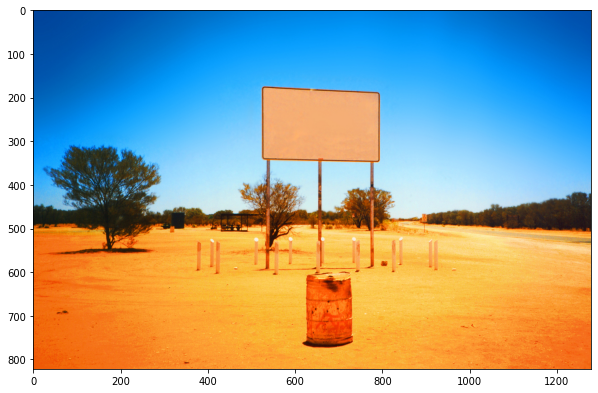

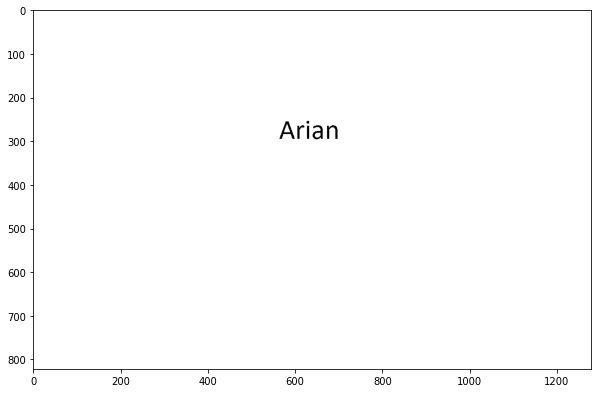

In [ ]:
plt.figure(figsize = (10,8))

baseImage = cv2.cvtColor(baseImage,cv2.COLOR_BGR2RGB)
plt.imshow(baseImage)

plt.figure(figsize = (10,8))

msgImage = cv2.cvtColor(msgImage,cv2.COLOR_RGB2GRAY)
plt.imshow(msgImage, cmap = 'gray')

## Converting Base Image to Grayscale
#### Simply converted my base image to gray and showed that using plt. As my grayscale image contains the data of an grayscale image I called plt.imshow function with cmap='gray' argument to show it properly.

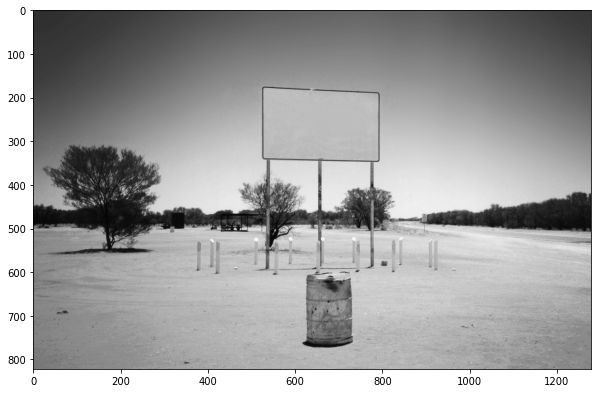

In [ ]:
grayBaseImage = cv2.cvtColor(baseImage,cv2.COLOR_RGB2GRAY)
plt.figure(figsize = (10,8))
plt.imshow(grayBaseImage, cmap='gray')

## Bit Plane Slicing the Base Image
#### To slice my image for every bit plane i should first convert the values to binary format and then cut those slices from most significant bit to the least significant one.
#### I made three functions for doing that and then I got the outputs in a for loop and stored them inside a list.
#### The discription of every function is written in the code as comments.

In [ ]:

row ,col = grayBaseImage.shape  # Saving the main image shape to use it in our loops and also may help us in reshapings

def cov_binary(num):            # This function could convert decimal to binary
    binary_num = [int(i) for i in list('{0:0b}'.format(num))]
    for j in range(8 - len(binary_num)):
        binary_num.insert(0,0)        
    return binary_num    
def conv_decimal(listt):        # This function could convert binary to decimal
    x = 0
    for i in range(8):
        x = x + int(listt[i])*(2**(7-i))
    return x
def discriminate_bit(bit,img):  # This is my main function with two arguments. bit argument is the bit plane number to slice. img is the image data in decimal format.
    z = np.zeros([row,col],dtype='uint8')
    for i in range(row):        # A for loop which loops over rows
        for j in range(col):    # Another for loop that iterates over columns
            x = cov_binary(img[i][j])
            for k in range(8):  # And another one that cycles through the 8 bit of every pixel
                if k == bit:
                    x[k] = x[k]
                else:
                    x[k] = 0
            x1 = conv_decimal(x)
            z[i][j] = x1
    return z

In [ ]:
bitplanes = []
for i in range(8):              # Calling my function to generate the needed 8 sliced bit plane and storing them in a list
  bitplanes.append(discriminate_bit(i,grayBaseImage))

## Bit Plane Visualization (Base Image)
#### I used a plt subplot to visualize my image bit planes. As it is illustrates nicely the most significant bit (bit number zero from left) is the most identical one and the least significant bit has barely information from the original photo.

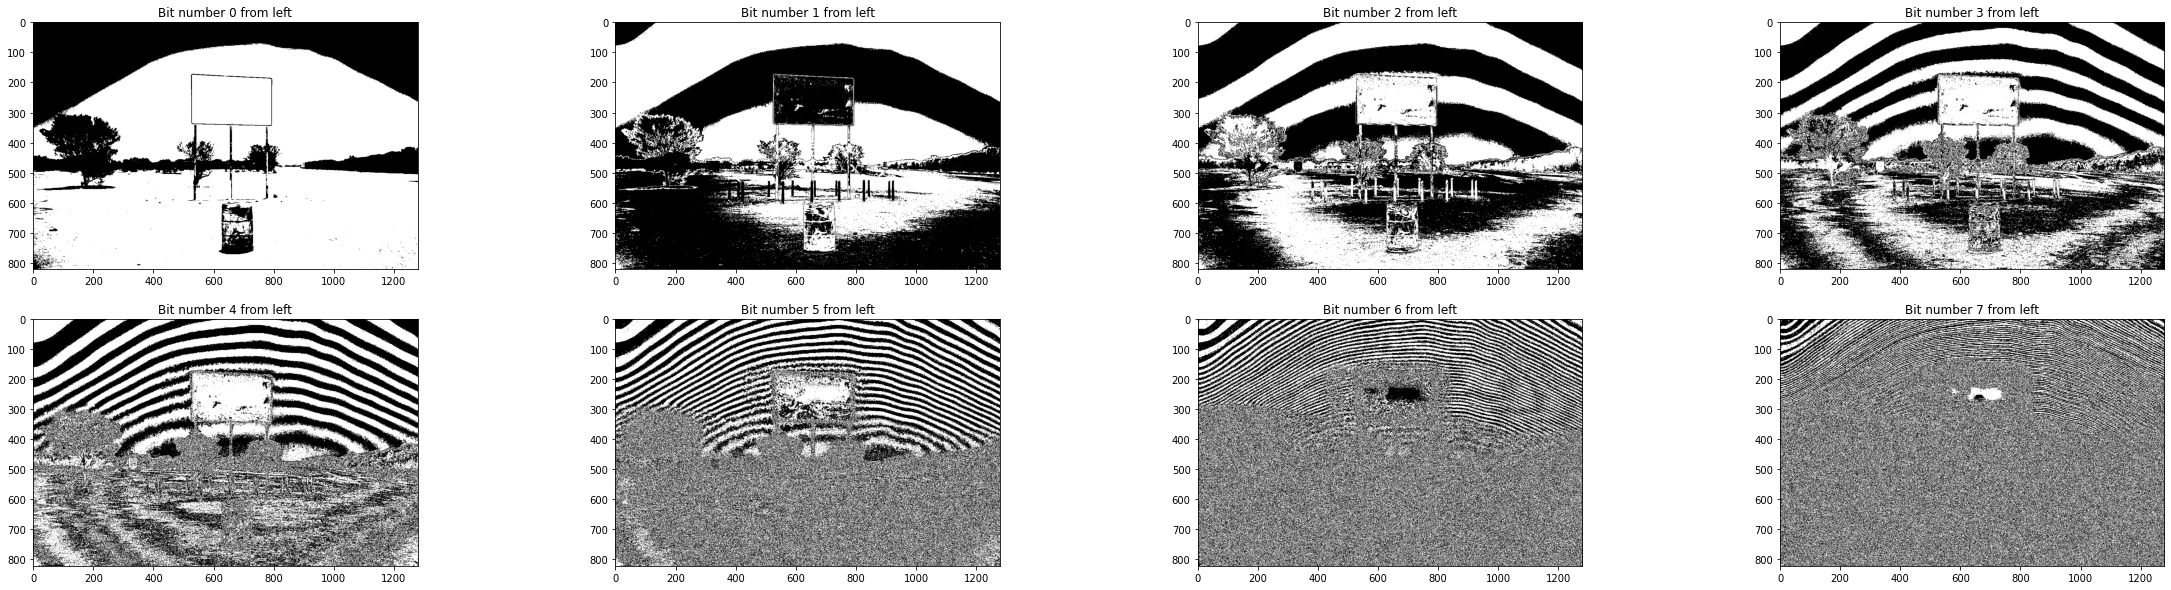

In [ ]:
plt.subplots(figsize=(40,10))
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(bitplanes[i], cmap = 'gray')
  plt.title(f'Bit number {i} from left')

## Adding message to every plane
#### Here I added the message image to every plane and addad them again to have the original message again.
#### It seems like it is a complicated nested loop but it is simple in the higher level of abstraction. The supplementary information about how my loop can be found in the code comments.

In [ ]:
bp_mg = list(range(8))          # This is the list which will contain our output.(Full images with the message added to one of it's bit planes)
for i in range(8):              # In this loop each bit plane will change with the message added one
  bptmp = bitplanes.copy()
  bptmp[i] = np.bitwise_and(bptmp[i], msgImage)
  for j in range(8):            # In this loop the bit planes of every image will be added together to make our 8 individual images
    bp_mg[i] = np.bitwise_or(bp_mg[i], bptmp[j])

## Visualize and Animate the output
#### I simply used plt subplot to show my outputs.
#### Then in a loop I ploted them individualy and saved them in a png file.
#### Then I made a gif file using those png files which is our project objective.

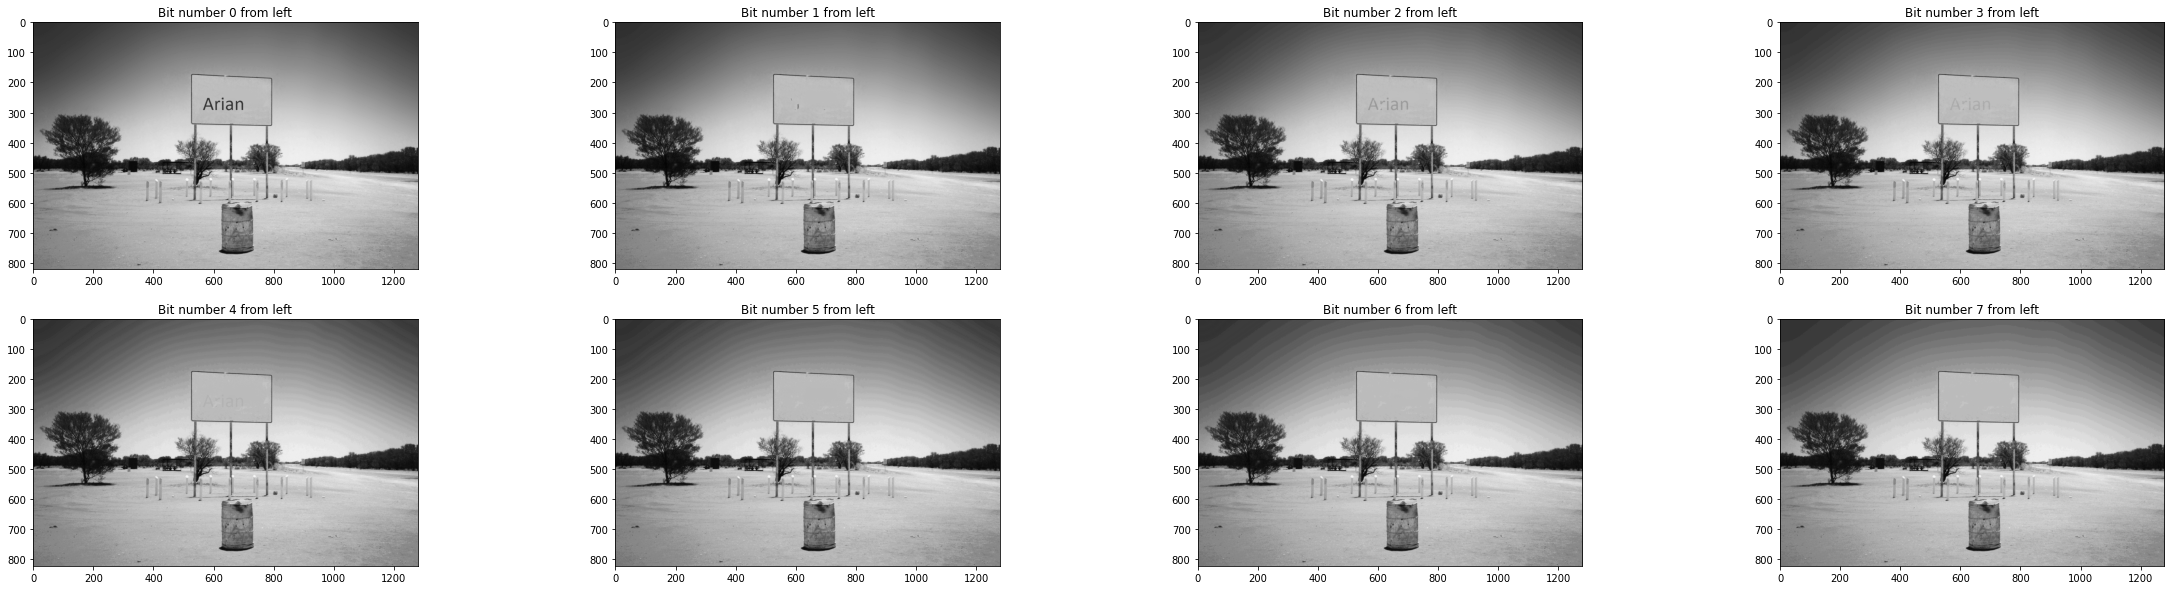

In [ ]:
plt.subplots(figsize=(40,10))
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(bp_mg[i], cmap = 'gray')
  plt.title(f'Bit number {i} from left')

In [ ]:
for i in range(8):
  plt.figure(figsize=(10,8))
  plt.imshow(bp_mg[i], cmap = 'gray')
  plt.savefig("{}.png".format(i))
  plt.clf()

with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in ['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png']:
        image = imageio.imread(filename)
        writer.append_data(image)

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

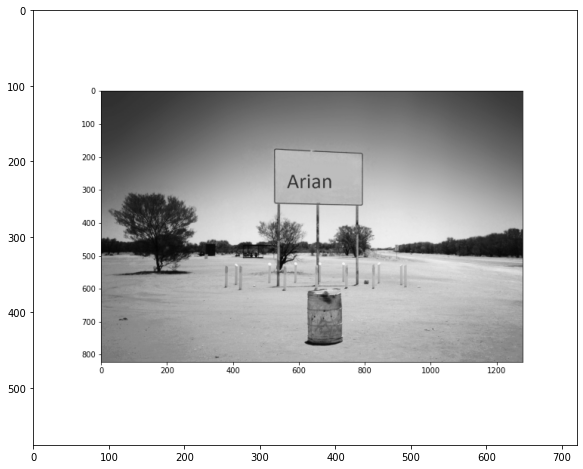

In [ ]:
gif = plt.imread("/content/mygif.gif")
plt.figure(figsize = (10,8))
plt.imshow(gif)   #That is well animated but it is not represented by colab. In files section, double clicking on mygif.gif and it will be shown in a window.